<center>
<img src="images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de  [Yury Kashnitsky](https://yorko.github.io). Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

# <center>  Visual data analysis
## Ejercicio02 Analizando pasajeros del "Titanic" 

**Complete el código que falta ("# You code here"). No es necesario seleccionar respuestas en un formulario web.**

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

**Leer datos**

In [46]:
train_df = pd.read_csv("data/titanic_train.csv", 
                       index_col='PassengerId') 

In [47]:
train_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [38]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Yrois, Miss. Henriette (""Mrs Harbeck"")",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Esta es una descripción de las variables:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **Survived** | Whether or not the passenger survived (Yes = 1, No = 0) | Numerical | Categorical |
| **Pclass** | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) | Numerical | Categorical |
| **Name** | The passenger's name | String | Categorical |
| **Sex** | Sex | String | Categorical |
| **Age** | Age in year | Numerical |  Quantitative|
| **SibSp** | # of siblings / spouses aboard the Titanic | Numerical | Categorical/Ordinal |
| **Parch** | # of parents / children aboard the Titanic | Numerical | Categorical/Ordinal |
| **Ticket** | Ticket number | String | Categorical |
| **Fare** | Passenger fare | Numerical | Quantitative |
| **Cabin** | Cabin number | String | Categorical |
| **Embarked** | Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) | String | Categorical |



**Vamos a sacar la variable`Cabin`, y todas las filas con NaN's y missing values.**

In [39]:
train_df = train_df.drop('Cabin', axis=1).dropna()

In [40]:
train_df.shape

(712, 10)

**1. Cree una figura para visualizar todos los diagramas de dispersión para cada par de características `Age`, `Fare`, `SibSp`, `Parch` y `Survived`. ( `scatter_matrix ` de Pandas or `pairplot` de Seaborn)**

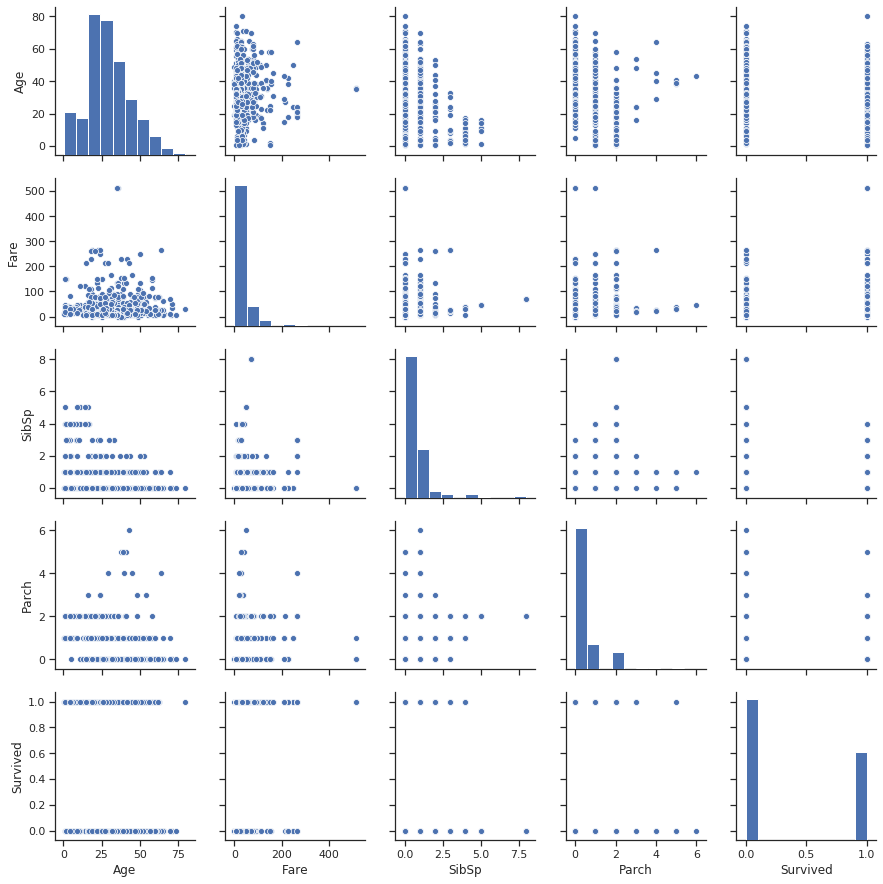

In [51]:
features = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
%config InlineBackend.figure_format = 'png'
sns.pairplot(train_df[features]);

**2. ¿Cómo depende el precio del boleto (`Fare`) de `Pclass`? Construya un diagrama de caja (boxplot).**

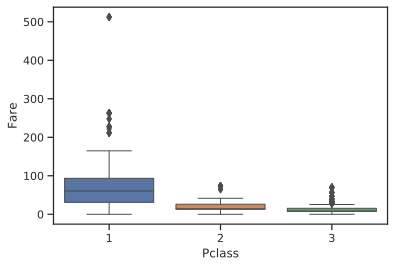

In [72]:
%config InlineBackend.figure_format = 'svg'
sns.boxplot(x='Pclass', y='Fare', data=train_df, linewidth=1);

The box plot confirms that the ticket fare is proportional to the Ticket class.Pretty much intuitive.
The distribution is skewed to the right .The median fares for 1st, 2nd and 3rd class is 59.4 £, 15 £ and 8.05 £. The mean fares for 1st, 2nd and 3rd class is 82.2 £, 21.2 £ and 13.3 £.(mean fares are greater than median fares).
Hence,a better measure of the center for this distribution is the median. Thus,1st class ticket costs about 3 times a 2nd class ticket and 2nd class ticket was worth about twice that of 3rd class.
The average and median fare for children is higher when compared to that of adults in same class.

**3. Construya el mismo gráfico pero restringiendo los valores de `Fare` para que sean menores que el cuantil 95%  del vector inicial (para descartar valores atípicos que hacen que el gráfico sea menos claro).**

**4. ¿Cómo depende el porcentaje de pasajeros sobrevivientes del género de los pasajeros? Representarlo con `Seaborn.countplot` usando el argumento `hue`.**

In [32]:
# You code here

**5. ¿Cómo difiere la distribución de los precios de las entradas para los que sobrevivieron y los que no? Representarlo con `Seaborn.boxplot`**

In [33]:
# You code here

**6. ¿Cómo depende la supervivencia de la edad de los pasajeros? Verifique (gráficamente) una suposición de que los jóvenes (<30 años) sobrevivieron con mayor frecuencia que las personas mayores (> 55 años).**

In [13]:
# You code here